# Skeleton of Assignment 4:
    test if the distribution of 
    
    1) trip duration of bikers that ride during the day vs night
    
    2) age of bikers for trips originating in Manhattan and in Brooklyn
    
    are different. Use 3 tests: KS, Pearson's, Spearman's. 
    
    Use the scipy.stats functions scipy.stats.ks_2samp, scipy.stats.pearsonr, scipy.stats.spearmanr. 
    
    For the KS do the test with the entire dataset and with a subset 200 times smaller
    
    Choose a single significant threshold for the whole exercise. 
    
    For each test phrase the Null Hypothesis in words.
    
    Describe the return of the scipy function you use in each case.
    
    State the result in terms of rejection of the Null.

In [2]:
# my usual imports and setups
import pylab as pl
import pandas as pd
import numpy as np
import scipy.stats


%pylab inline

import os
#this makes my plots pretty! but it is totally not mandatory to do it
import json
#s = json.load( open(os.getenv ('PUI2016')+"/fbb_matplotlibrc.json") )
#pl.rcParams.update(s)



Populating the interactive namespace from numpy and matplotlib


In [11]:
os.environ["PUIDATA"] = "%s/PUIdata"%os.getenv("HOME")

print("PUIdata", os.getenv("PUIDATA"))

('PUIdata', '/nfshome/jz3309/PUIdata')


In [12]:
import numpy as np

import os

import sys



#check if the env variable PUIDATA exists

if os.getenv("PUIDATA") is None:

    print ("must set PUIDATA env variable")

    sys.exit()



def getCitiBikeCSV(datestring):

    '''Downloads citibike data and unzips it. If the data is downloaded by not unzippeds it zips it. Moves the data to $PUIDATA

    Arguments:

        date string as yyyymm

    '''

    print ("Downloading", datestring)

    ### First I will heck that it is not already there

    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):

        if os.path.isfile(datestring + "-citibike-tripdata.csv"):

            # if in the current dir just move it

            if os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA")):

                print ("Error moving file!, Please check!")

        #otherwise start looking for the zip file

        else:

            if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip"):

                if not os.path.isfile(datestring + "-citibike-tripdata.zip"):

                    os.system("curl -O https://s3.amazonaws.com/tripdata/" + datestring + "-citibike-tripdata.zip")

                ###  To move it I use the os.system() functions to run bash commands with arguments

                os.system("mv " + datestring + "-citibike-tripdata.zip " + os.getenv("PUIDATA"))

            ### unzip the csv 

            os.system("unzip " + os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.zip")

            ## NOTE: old csv citibike data had a different name structure. 

            if '2014' in datestring:

                os.system("mv " + datestring[:4] + '-' +  datestring[4:] + 

                          "\ -\ Citi\ Bike\ trip\ data.csv " + datestring + "-citibike-tripdata.csv")

            os.system("mv " + datestring + "-citibike-tripdata.csv " + os.getenv("PUIDATA"))

    ### One final check:

    if not os.path.isfile(os.getenv("PUIDATA") + "/" + datestring + "-citibike-tripdata.csv"):

        print ("WARNING!!! something is wrong: the file is not there!")



    else:

        print ("file in place, you can continue")

# Read in data
I am reading in data from January 2015 with the function that I created getCitiBikeCSV. You are requested to use 2 months at least. It would be a good idea to use data from a colder and a warmer months, since there are more riders in the warm weather and ridership patterns may change with weather, temperature, etc. You should use data from multiple months, joining multiple datasets (thus addressing some systematic errors as well)

In [16]:
datestring = '201401'
getCitiBikeCSV(datestring)

('Downloading', '201401')
file in place, you can continue


In [17]:
df = pd.read_csv(os.getenv("PUIDATA") + "/" + datestring + '-citibike-tripdata.csv')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1
4,660,2014-01-01 00:05:18,2014-01-01 00:16:18,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1


In [18]:
# df is the dataframe where the content of the csv file is stored
df['date'] = pd.to_datetime(df['starttime'])
# note that with dataframes I can refer to variables as dictionary keys, 
# i.e. df['starttime'] or as attributes: df.starttime. 
df['hour'] = df['date'].dt.hour
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,date,hour
0,471,2014-01-01 00:00:06,2014-01-01 00:07:57,2009,Catherine St & Monroe St,40.711174,-73.996826,263,Elizabeth St & Hester St,40.717290,-73.996375,16379,Subscriber,1986,1,2014-01-01 00:00:06,0
1,1494,2014-01-01 00:00:38,2014-01-01 00:25:32,536,1 Ave & E 30 St,40.741444,-73.975361,259,South St & Whitehall St,40.701221,-74.012342,15611,Subscriber,1963,1,2014-01-01 00:00:38,0
2,464,2014-01-01 00:03:59,2014-01-01 00:11:43,228,E 48 St & 3 Ave,40.754601,-73.971879,2022,E 59 St & Sutton Pl,40.758491,-73.959206,16613,Subscriber,1991,1,2014-01-01 00:03:59,0
3,373,2014-01-01 00:05:15,2014-01-01 00:11:28,519,Pershing Square N,40.751884,-73.977702,526,E 33 St & 5 Ave,40.747659,-73.984907,15938,Subscriber,1989,1,2014-01-01 00:05:15,0
4,660,2014-01-01 00:05:18,2014-01-01 00:16:18,83,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,436,Hancock St & Bedford Ave,40.682166,-73.953990,19830,Subscriber,1990,1,2014-01-01 00:05:18,0


In [19]:
df.columns

Index([u'tripduration', u'starttime', u'stoptime', u'start station id',
       u'start station name', u'start station latitude',
       u'start station longitude', u'end station id', u'end station name',
       u'end station latitude', u'end station longitude', u'bikeid',
       u'usertype', u'birth year', u'gender', u'date', u'hour'],
      dtype='object')

# SPLIT BY CATEGORY

as an example I am splitting data by gender and looking at age or riders:

**H0: there is no statistical difference in trips duration for day and night riders.**

$$ \alpha = 0.05 $$

extracting the age happens in the cell below

In [21]:
#df is the dataframe where the content of the csv file is stored
df_d=df[['tripduration','hour']]
df_d['day_duration'] = df_d['tripduration'][(df_d['hour'] > 5) & (df_d['hour'] <= 18)]
df_d['night_duration'] = df_d['tripduration'][  (df_d['hour'] <= 5)|(df_d['hour'] > 18)]
df_d['day_duration'].dropna(inplace= True)
df_d['night_duration'].dropna(inplace= True)
df_d.head()

/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/nfshome/jz3309/.conda/envs/myEnv/lib/python2.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,tripduration,hour,day_duration,night_duration
0,471,0,NaN,471.0
1,1494,0,NaN,1494.0
2,464,0,NaN,464.0
3,373,0,NaN,373.0
4,660,0,NaN,660.0


In [22]:
#your df should look something like this
# look at these data carefully... you may see someinteresting values!
df_d.describe()

,tripduration,hour,day_duration,night_duration
count,3.004000e+05,300400.000000,2.390120e+05,61388.000000
mean,7.339689e+02,13.827154,7.371349e+02,721.642455
std,5.271464e+03,4.905981,5.453831e+03,4491.449449
min,6.000000e+01,0.000000,6.000000e+01,60.000000
25%,3.400000e+02,9.000000,3.440000e+02,324.000000
50%,5.130000e+02,14.000000,5.180000e+02,492.000000
75%,7.880000e+02,18.000000,7.950000e+02,762.000000
max,1.990440e+06,23.000000,1.990440e+06,813179.000000


In [23]:
# dropping NaN values
df_d['day_duration'].dropna(inplace= True)
df_d['night_duration'].dropna(inplace= True)

Text(0,0.5,'Rides Count')

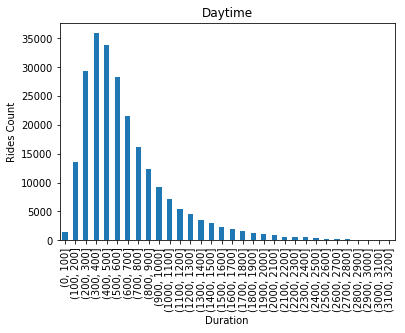

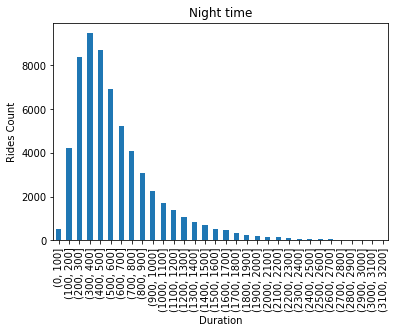

In [41]:
bins = np.arange(0, 3300, 100)
ax1 = df_d.day_duration.groupby(pd.cut(df_d.day_duration, bins)).agg([count_nonzero]).plot(kind='bar', 
                                                               legend=False)
ax1.set_title("Daytime")
ax2 = df_d.night_duration.groupby(pd.cut(df_d.night_duration, bins)).agg([count_nonzero]).plot(kind='bar',
                                                            legend=False)
ax2.set_title("Night time");
ax1.set_xlabel('Duration')
ax1.set_ylabel('Rides Count')
ax2.set_xlabel('Duration')
ax2.set_ylabel('Rides Count')

Figure 1: histogrammed distribution of riders'count by day and night. The plot shows that there are much more rides during the day than the night. 

In [42]:
cs1=df_d.day_duration.groupby(pd.cut(df_d.day_duration, bins)).agg([count_nonzero]).cumsum()

cs2=df_d.night_duration.groupby(pd.cut(df_d.night_duration, bins)).agg([count_nonzero]).cumsum()

print (np.abs(cs2 / cs2.max()-cs1 / cs1.max()))



                count_nonzero
night_duration               
(0, 100]             0.002365
(100, 200]           0.014437
(200, 300]           0.028323
(300, 400]           0.032330
(400, 500]           0.032211
(500, 600]           0.026211
(600, 700]           0.021249
(700, 800]           0.019961
(800, 900]           0.018243
(900, 1000]          0.016162
(1000, 1100]         0.014517
(1100, 1200]         0.014113
(1200, 1300]         0.012735
(1300, 1400]         0.011829
(1400, 1500]         0.011022
(1500, 1600]         0.009512
(1600, 1700]         0.008925
(1700, 1800]         0.007462
(1800, 1900]         0.006164
(1900, 2000]         0.004888
(2000, 2100]         0.003932
(2100, 2200]         0.003552
(2200, 2300]         0.002990
(2300, 2400]         0.002157
(2400, 2500]         0.001325
(2500, 2600]         0.000894
(2600, 2700]         0.000746
(2700, 2800]         0.000378
(2800, 2900]         0.000345
(2900, 3000]         0.000296
(3000, 3100]         0.000089
(3100, 320

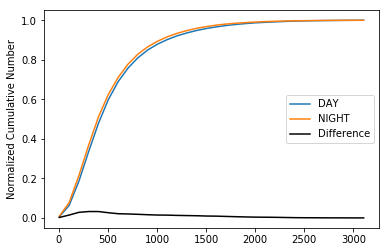

In [43]:
pl.plot(bins[:-1] + 5, cs1 / cs1.max(), label = "DAY")
pl.plot(bins[:-1] + 5, cs2 / cs2.max(), label = "NIGHT")
pl.plot(bins[:-1] + 5, np.sqrt(cs2 / cs2.max() - cs1 / cs1.max())**2, 'k-',
        label = "Difference")
pl.xlabel("")
pl.ylabel("Normalized Cumulative Number")
pl.legend()

Figure 2: The cumulative distribution of trip durations by day and night.
The Normalized cumulative distributions for day and night are very similar.

In [32]:
import scipy.stats
#remember that your imports should all be at the top. I leave it here to hightlight that this package is needed at this point of the workflow

# KS tests to compare 2 samples

http://docs.scipy.org/doc/scipy-0.15.1/reference/generated/scipy.stats.ks_2samp.html

the KS test in scipy returns the p-value BUT make sure you understand what the NULL is! read the documentation carefully! what is the null hypothesis that you can/cannot reject?

In [33]:
ks = scipy.stats.ks_2samp(df_d.day_duration, df_d.night_duration)
print (ks)
#If the K-S statistic is small or the p-value is high, then we cannot
#reject the hypothesis that the distributions of the two samples
#are the same.

Ks_2sampResult(statistic=0.03479020660856952, pvalue=7.871708751755131e-52)



I reject the null hypothesis. 
There is no statistical difference in the trips duration for day and night riders.The p-value 0.00 is lower than the 0.05.

### smaller sample

In [36]:
df_n = df_d.sample(len(df_d)/200,random_state=22)
df_n['day_duration'].dropna(inplace= True)
df_n['night_duration'].dropna(inplace= True)



In [37]:
ksn = scipy.stats.ks_2samp(df_2.day_duration, df_2.night_duration)
print (ks2)

Ks_2sampResult(statistic=0.04899265889490734, pvalue=0.6501139406995069)


I can not reject the null hypothesis. There is no statistical difference in the trips duration for day and night riders.The p-value 0.65 is higher than the 0.05.

# Pearson's  test for correlation

** notice that the Pearson's is a pairwise test: the samples need to be **
 a. the same size
 b. sorted! (how??)
    
http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.pearsonr.html#scipy.stats.pearsonr



### Null hypothesis: There is no relationship between the rides of day rides and night rides.

α=0.05

In [39]:
# your code here!
# wrangle the data as needed
# please perform the Pearson's test 
# and tell me what you find in terms of NULL hypothesis
np.random.seed()
DFD = np.random.choice(df_1['day_duration'], 61388, replace=False)

pearson = scipy.stats.pearsonr(DFD, df_d.night_duration)
print(pearson)

(0.0041878578057197935, 0.29945991526911264)


### The Pearson's correlation is 0.004 and the pvalue is 0.299. The pvalue is higher than  0.05 so I can  not reject the null hypothesis. So, there are  no duration differences between day and night.

# Spearman's  test for correlation

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.spearmanr.html#scipy.stats.spearmanr

In [40]:
# your code here!
# wrangle the data as needed
# please perform the Spearman's test and tell me what you find in terms of NULL hypothesis

np.random.seed()

spearman = scipy.stats.spearmanr(DFD, df_d.night_duration)

print(spearman)

SpearmanrResult(correlation=0.0030592236692513976, pvalue=0.4484761218034645)


### The result of apearman's test is 0.03 and the pvalue is 0.44. The pvalue is higher than 0.05 so I can not reject the null hypothesis. There are no differences between day and night duration.